## *Import the libraries*

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Overview.csv")
df.head(10)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0,0,0,37,0,0,0
1,2019-06-25T13:09,0,0,0,37,0,0,0
2,2019-06-27T10:49,0,0,0,38,0,0,0
3,2019-06-27T10:51,0,0,0,38,0,0,0
4,2019-06-27T10:52,0,0,0,39,0,0,0
5,2019-06-27T10:52,0,0,0,38,0,0,0
6,2019-06-27T10:53,0,0,0,39,0,0,0
7,2019-06-27T10:54,0,0,0,39,0,0,0
8,2019-06-27T10:56,0,0,0,38,0,0,0
9,2019-06-27T10:57,0,0,0,39,0,0,0


In [6]:
df.drop('DeviceTimeStamp', axis=1, inplace = True) ## set axis = 0 to remove rows, axis = 1 to remove colums
df.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,0,0,0,37,0,0,0
1,0,0,0,37,0,0,0
2,0,0,0,38,0,0,0
3,0,0,0,38,0,0,0
4,0,0,0,39,0,0,0


In [7]:
X = df.drop('OTI_T', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy
X.head()

,OTI,WTI,ATI,OLI,OTI_A,MOG_A
0,0,0,0,37,0,0
1,0,0,0,37,0,0
2,0,0,0,38,0,0
3,0,0,0,38,0,0
4,0,0,0,39,0,0


In [8]:
y = df['OTI_T'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: OTI_T, dtype: int64

## *Train-Test split*

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4)

## *Feature Scaling*

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## *SVM classifier* Kernel: rbf

In [15]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

## *Logistic Classifier*

In [16]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

# Plot ROC and compare AUC

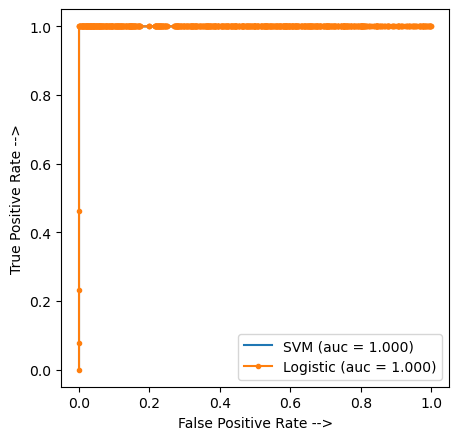

In [17]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()